<a href="https://colab.research.google.com/github/kevinnsinaga05/skills-copilot-codespaces-vscode/blob/main/DT_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Tahap 1: Mengumpulkan data

In [1]:
#Import beberapa library yang diperlukan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Melakukan koneksi ke datasheet yang di google drive
from google.colab import drive
drive.mount('/content/drive')
import sys

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#membaca data dari drive
dt = pd.read_csv('/content/drive/My Drive/DSI/dataset/creditapproval-data_kotor.csv')

In [ ]:
#Menampilkan 5 datasheet teratas
dt.head()

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,x1,P,40.0,345000.0,1.0,345000.00,100,301,6000.0,1,874,875,345000.0,345000.00,0.0,MACET
1,x2,L,31.0,350000.0,7.0,55716.00,100,301,6000.0,1,874,875,390000.0,111428.00,0.0,MACET
2,x3,L,NaN,649926.0,6.0,108321.00,100,301,6000.0,1,874,875,649926.0,216642.00,0.0,MACET
3,x4,P,2.0,459168.0,NaN,38264.00,100,301,6000.0,1,874,875,459168.0,382640.00,0.0,MACET
4,x5,WANITA,34.0,3055499.0,8.0,381937.41,100,301,6000.0,1,874,875,3055499.0,1527749.48,0.0,MACET


## Tahap 2: Menelaah data

**Analisis Karakteristik Data**

In [ ]:
#Cek tipe data
dt.dtypes

nama_nasabah               object
jenis_kelamin              object
umur                      float64
jml_pinjaman              float64
jkw                       float64
jml_angsuran_per_bulan    float64
type_pinjaman               int64
jenis_pinjaman              int64
bi_sektor_ekonomi         float64
col                         int64
bi_golongan_debitur         int64
bi_gol_penjamin             int64
saldo_nominatif           float64
tunggakan_pokok           float64
tunggakan_bunga           float64
status kredit              object
dtype: object

In [ ]:
# Telaah data secara statistik deskriptif/rincian data
dt.describe()

,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga
count,757.000000,7.660000e+02,758.000000,7.660000e+02,766.0,766.000000,765.000000,766.000000,766.000000,766.000000,7.660000e+02,7.660000e+02,7.660000e+02
mean,29.073976,2.712483e+06,19.011873,2.333917e+05,100.0,301.197128,6013.045752,1.216710,873.968668,281.300261,2.007386e+06,7.900853e+05,8.771708e+04
std,264.552192,9.995602e+06,32.231431,5.489682e+05,0.0,0.822267,216.196305,0.412273,1.460257,408.099019,8.711282e+06,4.139217e+06,5.682318e+05
min,-7162.000000,8.333333e+04,1.000000,0.000000e+00,100.0,301.000000,6000.000000,1.000000,834.000000,0.000000,-4.000000e+06,0.000000e+00,0.000000e+00
25%,32.000000,8.489286e+05,8.000000,6.750000e+04,100.0,301.000000,6000.000000,1.000000,874.000000,0.000000,5.337500e+05,9.885424e+04,0.000000e+00
50%,38.000000,1.500000e+06,12.000000,1.050000e+05,100.0,301.000000,6000.000000,1.000000,874.000000,0.000000,9.462828e+05,3.391669e+05,0.000000e+00
75%,43.000000,2.000000e+06,20.000000,2.333334e+05,100.0,301.000000,6000.000000,1.000000,874.000000,875.000000,1.639582e+06,7.500000e+05,5.814889e+04
max,1043.000000,2.286550e+08,679.000000,1.035000e+07,100.0,305.000000,9990.000000,2.000000,876.000000,875.000000,2.094041e+08,9.161212e+07,1.100000e+07


In [ ]:
#cek missing value
dt.isnull().sum()

nama_nasabah              0
jenis_kelamin             0
umur                      9
jml_pinjaman              0
jkw                       8
jml_angsuran_per_bulan    0
type_pinjaman             0
jenis_pinjaman            0
bi_sektor_ekonomi         1
col                       0
bi_golongan_debitur       0
bi_gol_penjamin           0
saldo_nominatif           0
tunggakan_pokok           0
tunggakan_bunga           0
status kredit             0
dtype: int64

Dari data tersebut, maka diketahui features yang memiliki missing value :<br>
1. Umur <br>
2. jkw <br>
3. bi_sektor_ekonomi

In [ ]:
#Identifikasi data unik dari atribut
dt.nunique()

nama_nasabah              766
jenis_kelamin               6
umur                       58
jml_pinjaman              328
jkw                        51
jml_angsuran_per_bulan    449
type_pinjaman               1
jenis_pinjaman              5
bi_sektor_ekonomi           3
col                         2
bi_golongan_debitur         3
bi_gol_penjamin             5
saldo_nominatif           528
tunggakan_pokok           490
tunggakan_bunga           142
status kredit               2
dtype: int64

In [ ]:
#Proses pengecekan isi kategori dari atribut yang ada
categorical_col = []
for column in dt.columns:
    if dt[column].dtype == object and len(dt[column].unique()) <= 50: #mengecek level/isi data kolom (bisa object, int, dan tipe data lainnya)
        categorical_col.append(column)
        print(f"{column} : {dt[column].unique()}")
        print("====================================")

jenis_kelamin : ['P' 'L' 'WANITA' 'LAKI-LAKI' 'PRIA' 'PEREMPUAN']
status kredit : ['MACET' 'LANCAR']


In [ ]:
# Mengumpulkan kolom-kolom yang akan diubah tipe datanya pada 1 list
kolom_diubah = ['jenis_kelamin', 'type_pinjaman',  'jenis_pinjaman', 'col', 'bi_golongan_debitur', 'bi_gol_penjamin', 'status kredit']

dt[kolom_diubah] = dt[kolom_diubah].astype('category')
dt.dtypes

nama_nasabah                object
jenis_kelamin             category
umur                       float64
jml_pinjaman               float64
jkw                        float64
jml_angsuran_per_bulan     float64
type_pinjaman             category
jenis_pinjaman            category
bi_sektor_ekonomi          float64
col                       category
bi_golongan_debitur       category
bi_gol_penjamin           category
saldo_nominatif            float64
tunggakan_pokok            float64
tunggakan_bunga            float64
status kredit             category
dtype: object

**Cek Distribusi / Keseimbangan Kelas**

In [ ]:
dt['status kredit'].value_counts()

MACET     556
LANCAR    210
Name: status kredit, dtype: int64

**Memvisualkan distribusi masing-masing atribute** <br>
misal menampilkan status kredit

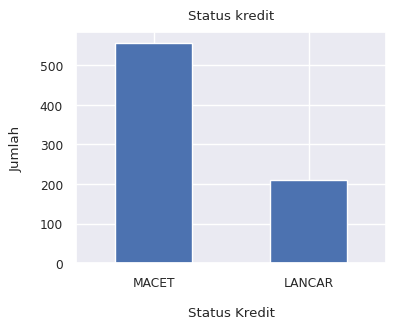

In [ ]:
sns.set(font_scale=0.8)
dt['status kredit'].value_counts().plot(kind='bar', figsize=(4, 3), rot=0)
plt.xlabel("Status Kredit", labelpad=12)
plt.ylabel("Jumlah", labelpad=12)
plt.title("Status kredit", y=1.02);

data di atas, ada data umur minimum yang negatif dan umur maximum 1043 <br>
cek atribute yang lain

## Tahap 3: Memilih Data, Membersihkan Data dan Validasi data

Dari proses di atas, ada proses validasi yang harus dilakukan, diantaranya : <br>
1. Validasi data kosong <br>
2. Validasi atribute yang kategori tidak konsisten (jenis kelamin <br>
3. Validasi data Outlier <br>

In [ ]:
#Melihat data invalid yaitu value negatif dari kolom umur
dt[dt['umur'] < 0]

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
306,x307,P,-42.0,247500.00,4.0,70313.00,100,301,6000.0,1,874,0,247500.00,123750.00,16876.0,MACET
361,x362,P,-48.0,500000.00,8.0,67500.00,100,301,6000.0,1,874,0,500000.00,62500.00,5000.0,LANCAR
525,x526,L,-49.0,1500000.00,5.0,345000.00,100,301,6000.0,1,874,0,1500000.00,0.00,0.0,LANCAR
560,x561,L,-48.0,330000.00,8.0,41250.00,100,303,6000.0,1,874,0,330000.00,82500.00,0.0,MACET
622,x623,L,-7162.0,750000.00,8.0,105000.00,100,301,6000.0,2,874,0,750000.00,750000.00,90000.0,MACET
730,x731,P,-47.0,833333.34,10.0,90833.64,100,301,6000.0,2,874,0,833333.34,833333.34,75000.0,MACET
738,x739,L,-44.0,1000000.00,5.0,230000.00,100,301,6000.0,2,874,0,1000000.00,1000000.00,150000.0,MACET


In [ ]:
#Mengganti data umur yang memiliki value negatif menjadi NA
dt['umur'] = np.where(dt['umur']<18, np.nan, dt['umur'])

In [ ]:
#Mengecek kembali masih ada kolom umur yang negatif
dt[dt['umur'] < 0]

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit


In [ ]:
#mengatasi missing value pada kolom umur
#data umur yang NA diganti data mean
rata_umur = dt['umur'].mean()
dt['umur'] = dt['umur'].fillna(rata_umur)

In [ ]:
# menampilkan info dari data kredit nasabah
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   nama_nasabah            766 non-null    object  
 1   jenis_kelamin           766 non-null    category
 2   umur                    766 non-null    float64 
 3   jml_pinjaman            766 non-null    float64 
 4   jkw                     758 non-null    float64 
 5   jml_angsuran_per_bulan  766 non-null    float64 
 6   type_pinjaman           766 non-null    category
 7   jenis_pinjaman          766 non-null    category
 8   bi_sektor_ekonomi       765 non-null    float64 
 9   col                     766 non-null    category
 10  bi_golongan_debitur     766 non-null    category
 11  bi_gol_penjamin         766 non-null    category
 12  saldo_nominatif         766 non-null    float64 
 13  tunggakan_pokok         766 non-null    float64 
 14  tunggakan_bunga         76

In [ ]:
dt.describe()

,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,bi_sektor_ekonomi,saldo_nominatif,tunggakan_pokok,tunggakan_bunga
count,766.000000,7.660000e+02,758.000000,7.660000e+02,765.000000,7.660000e+02,7.660000e+02,7.660000e+02
mean,40.247606,2.712483e+06,19.011873,2.333917e+05,6013.045752,2.007386e+06,7.900853e+05,8.771708e+04
std,37.212729,9.995602e+06,32.231431,5.489682e+05,216.196305,8.711282e+06,4.139217e+06,5.682318e+05
min,19.000000,8.333333e+04,1.000000,0.000000e+00,6000.000000,-4.000000e+06,0.000000e+00,0.000000e+00
25%,33.250000,8.489286e+05,8.000000,6.750000e+04,6000.000000,5.337500e+05,9.885424e+04,0.000000e+00
50%,39.000000,1.500000e+06,12.000000,1.050000e+05,6000.000000,9.462828e+05,3.391669e+05,0.000000e+00
75%,43.000000,2.000000e+06,20.000000,2.333334e+05,6000.000000,1.639582e+06,7.500000e+05,5.814889e+04
max,1043.000000,2.286550e+08,679.000000,1.035000e+07,9990.000000,2.094041e+08,9.161212e+07,1.100000e+07


dari statistik deskripsif di atas, masih muncul outlier

In [ ]:
#menangani missing value di kolom jkw
rata_jkw = dt['jkw'].mean()
dt['jkw'] = dt['jkw'].fillna(rata_jkw)

In [ ]:
#mengecek kembali jumlah missing value
dt.isnull().sum()

nama_nasabah              0
jenis_kelamin             0
umur                      0
jml_pinjaman              0
jkw                       0
jml_angsuran_per_bulan    0
type_pinjaman             0
jenis_pinjaman            0
bi_sektor_ekonomi         1
col                       0
bi_golongan_debitur       0
bi_gol_penjamin           0
saldo_nominatif           0
tunggakan_pokok           0
tunggakan_bunga           0
status kredit             0
dtype: int64

In [ ]:
#menangani missing value di kolom bi_sektor_ekonomi
rata_bi_sektor_ekonomi = dt['bi_sektor_ekonomi'].mean()
dt['bi_sektor_ekonomi'] = dt['bi_sektor_ekonomi'].fillna(rata_bi_sektor_ekonomi)

In [ ]:
#mengecek kembali jumlah missing value
dt.isnull().sum()

nama_nasabah              0
jenis_kelamin             0
umur                      0
jml_pinjaman              0
jkw                       0
jml_angsuran_per_bulan    0
type_pinjaman             0
jenis_pinjaman            0
bi_sektor_ekonomi         0
col                       0
bi_golongan_debitur       0
bi_gol_penjamin           0
saldo_nominatif           0
tunggakan_pokok           0
tunggakan_bunga           0
status kredit             0
dtype: int64

In [ ]:
#Pengecekan Keunikan data category
dt.nunique()

nama_nasabah              766
jenis_kelamin               6
umur                       49
jml_pinjaman              328
jkw                        52
jml_angsuran_per_bulan    449
type_pinjaman               1
jenis_pinjaman              5
bi_sektor_ekonomi           4
col                         2
bi_golongan_debitur         3
bi_gol_penjamin             5
saldo_nominatif           528
tunggakan_pokok           490
tunggakan_bunga           142
status kredit               2
dtype: int64

In [ ]:
#dari proses ini kode jenis kelamin ada 6, lebih baik dibuat P dan L
dt['jenis_kelamin'].unique()

['P', 'L', 'WANITA', 'LAKI-LAKI', 'PRIA', 'PEREMPUAN']
Categories (6, object): ['L', 'LAKI-LAKI', 'P', 'PEREMPUAN', 'PRIA', 'WANITA']

In [ ]:
#proses mennganti kategori selain P dan L menjadi P dan L
dt["jenis_kelamin"] = dt["jenis_kelamin"].str.replace("WANITA", "P")
dt["jenis_kelamin"] = dt["jenis_kelamin"].str.replace("PEREMPUAN", "P")
dt["jenis_kelamin"] = dt["jenis_kelamin"].str.replace("LAKI-LAKI", "L")
dt["jenis_kelamin"] = dt["jenis_kelamin"].str.replace("PRIA", "L")

In [ ]:
#cek apakah atribute jenis kelamin sudah P dan L
dt["jenis_kelamin"].unique()

array(['P', 'L'], dtype=object)

In [ ]:
#Mengecek data outlier
dt.describe()

,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,bi_sektor_ekonomi,saldo_nominatif,tunggakan_pokok,tunggakan_bunga
count,766.000000,7.660000e+02,766.000000,7.660000e+02,766.000000,7.660000e+02,7.660000e+02,7.660000e+02
mean,40.247606,2.712483e+06,19.011873,2.333917e+05,6013.045752,2.007386e+06,7.900853e+05,8.771708e+04
std,37.212729,9.995602e+06,32.062457,5.489682e+05,216.054954,8.711282e+06,4.139217e+06,5.682318e+05
min,19.000000,8.333333e+04,1.000000,0.000000e+00,6000.000000,-4.000000e+06,0.000000e+00,0.000000e+00
25%,33.250000,8.489286e+05,8.000000,6.750000e+04,6000.000000,5.337500e+05,9.885424e+04,0.000000e+00
50%,39.000000,1.500000e+06,12.000000,1.050000e+05,6000.000000,9.462828e+05,3.391669e+05,0.000000e+00
75%,43.000000,2.000000e+06,20.000000,2.333334e+05,6000.000000,1.639582e+06,7.500000e+05,5.814889e+04
max,1043.000000,2.286550e+08,679.000000,1.035000e+07,9990.000000,2.094041e+08,9.161212e+07,1.100000e+07


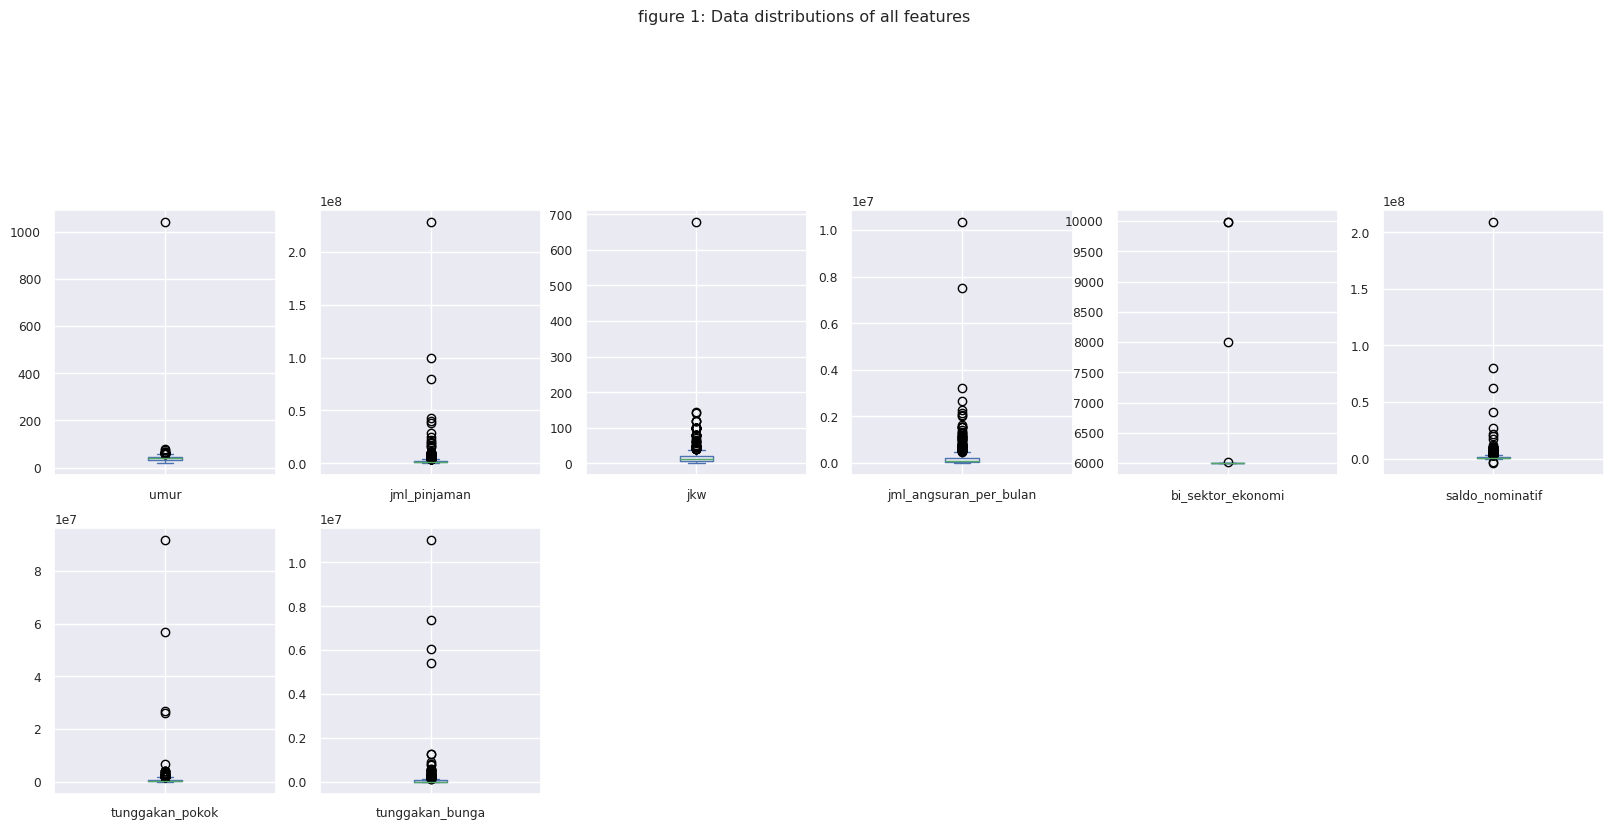

In [ ]:
dt.plot(kind='box',subplots=True,layout=(5,6), sharex=False,figsize = (20,20),
                           title='figure 1: Data distributions of all features')
plt.show()

#Membuat fungsi untuk mengurangi outlier

In [ ]:
def detect_outliers(dt, x):
    Q1 = dt[x].describe()['25%']
    Q3 = dt[x].describe()['75%']
    IQR = Q3-Q1
    dt[x] = np.where(dt[x]<Q1, IQR, dt[x])
    dt[x] = np.where(dt[x]> Q3 , IQR, dt[x])
    return 0

In [ ]:
#simulasi menjalankan fungsi mengurangi outlier untuk atribute umur
detect_outliers(dt,'umur')

0

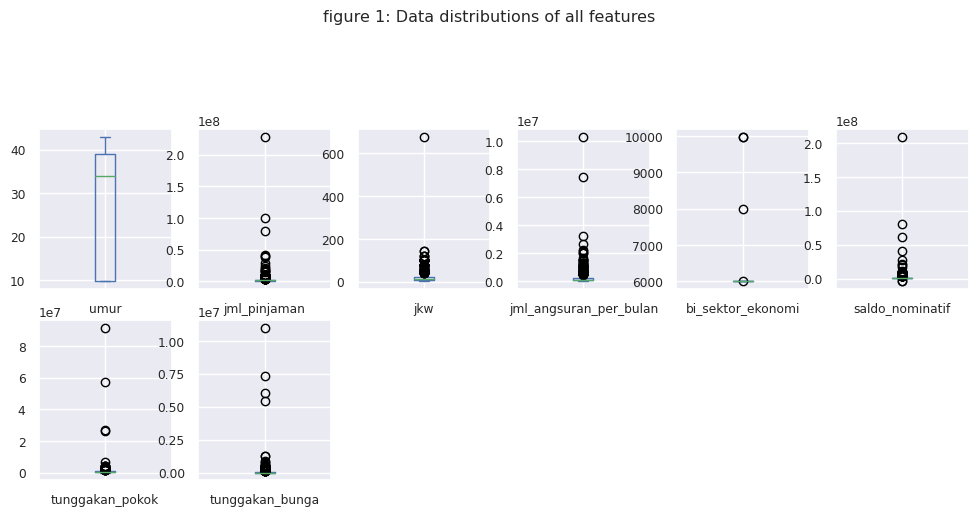

In [ ]:
#melihat outlier kembali
dt.plot(kind='box',subplots=True,layout=(5,6), sharex=False,figsize = (12,12),
                           title='figure 1: Data distributions of all features')
plt.show()

In [ ]:
detect_outliers(dt,'jml_pinjaman')
detect_outliers(dt,'jkw')
detect_outliers(dt,'jml_angsuran_per_bulan')
detect_outliers(dt,'bi_sektor_ekonomi')

0

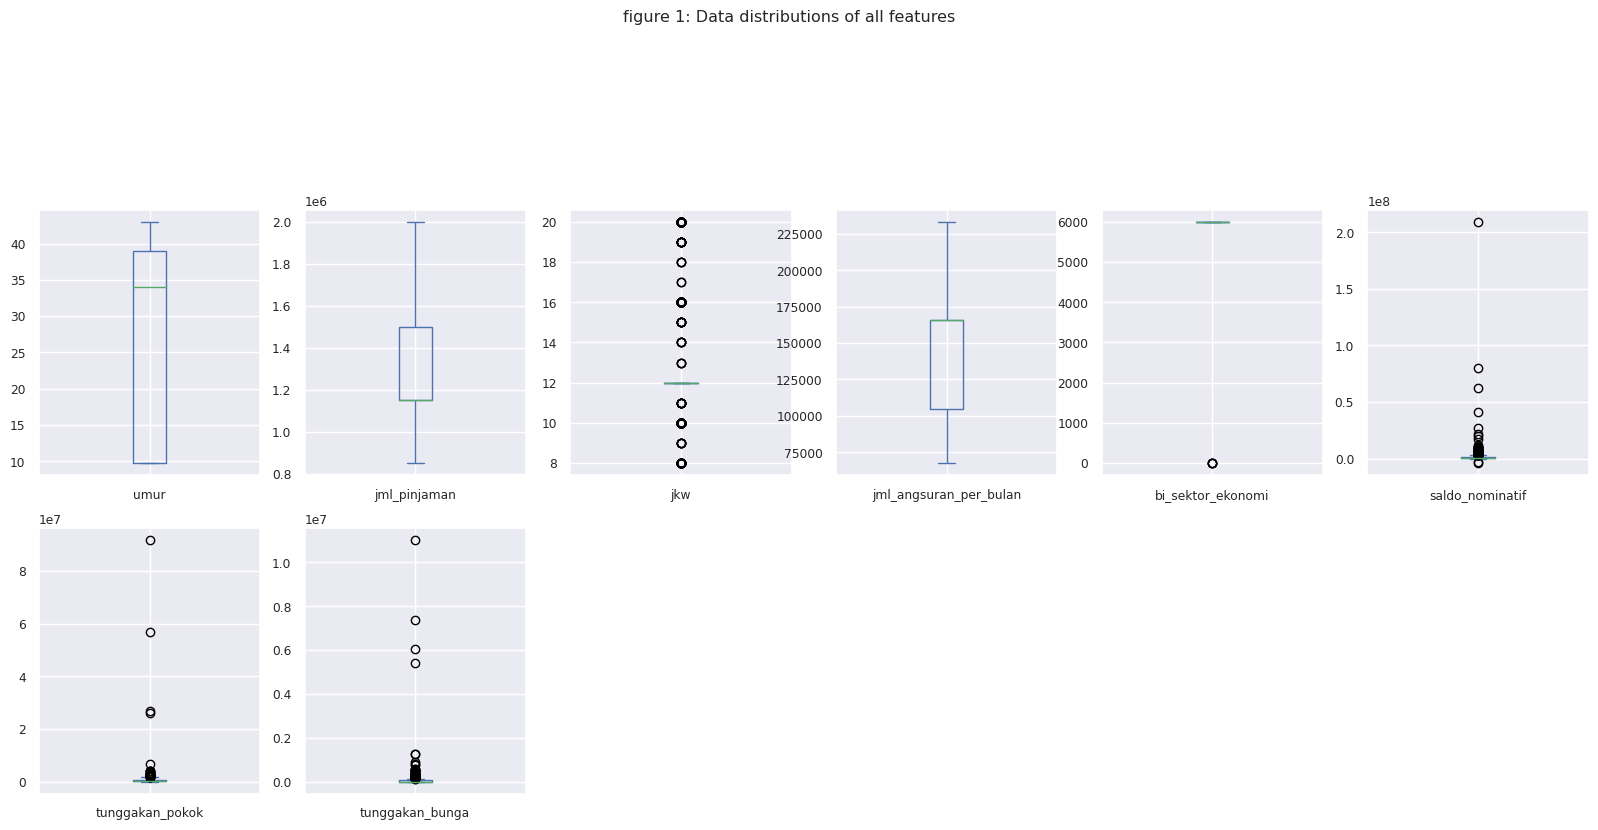

In [ ]:
#melihat outlier kembali
dt.plot(kind='box',subplots=True,layout=(5,6), sharex=False,figsize = (20,20),
                           title='figure 1: Data distributions of all features')
plt.show()

In [ ]:
detect_outliers(dt,'tunggakan_bunga')
detect_outliers(dt,'tunggakan_pokok')
detect_outliers(dt,'saldo_nominatif')

0

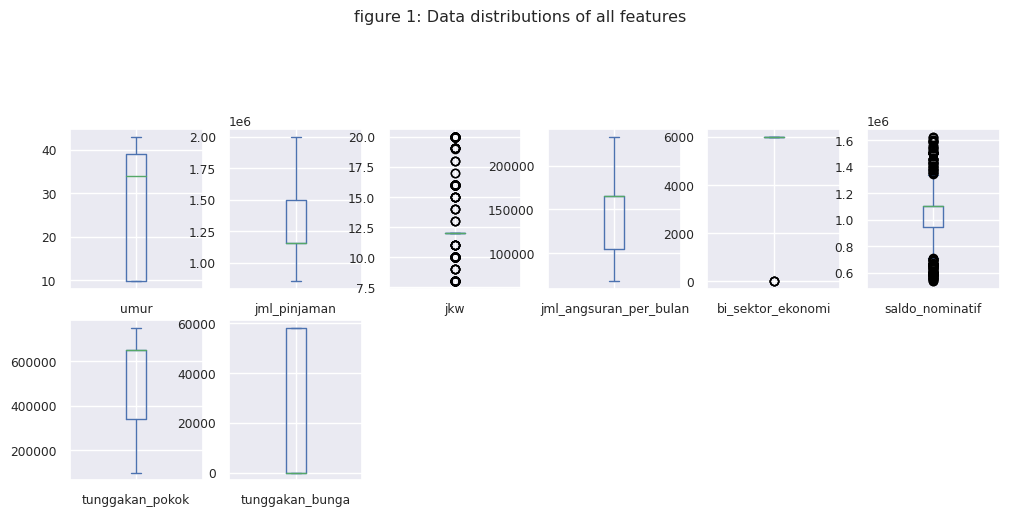

In [ ]:
#melihat outlier kembali
dt.plot(kind='box',subplots=True,layout=(5,6), sharex=False,figsize = (12,12),
                           title='figure 1: Data distributions of all features')
plt.show()

## Tahap 4: Menentukan Object data

In [ ]:
dt = dt.drop(columns='nama_nasabah')
dt = dt.drop(columns='jenis_kelamin')
dt = dt.drop(columns='umur')
dt = dt.drop(columns='bi_sektor_ekonomi')

## Tahap 5: Membersihkan data

## Tahap 6: Mengkonstruksi data

<ipython-input-37-3a71bf129d14>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dt.corr()


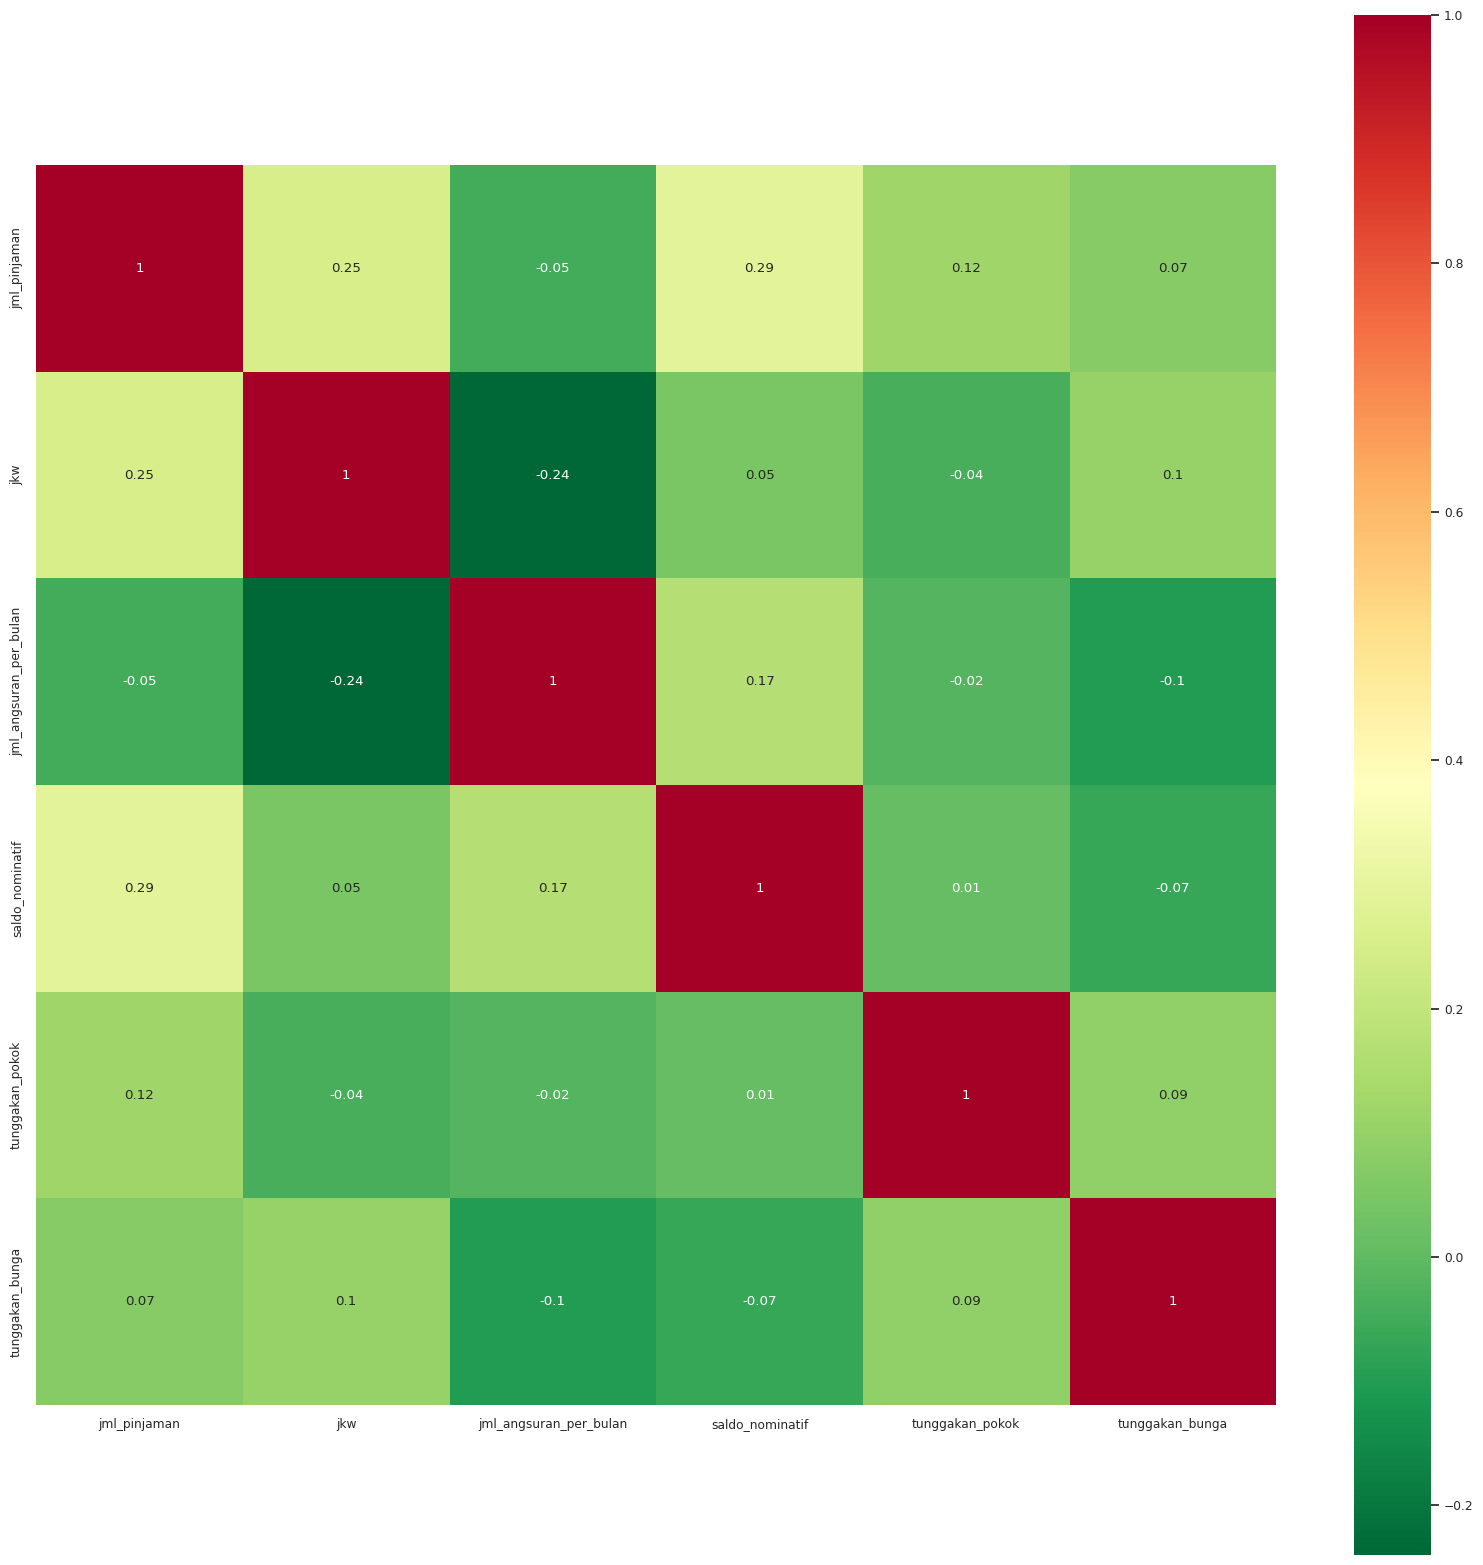

In [ ]:
# Correlation Heatmap
correlation = dt.corr()
plt.subplots(figsize = (20,20))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

In [ ]:
dt = dt.drop(columns='nama_nasabah')
dt = dt.drop(columns='jenis_kelamin')
dt = dt.drop(columns='umur')
dt = dt.drop(columns='bi_sektor_ekonomi')

## Tahap 7: Menentukan Feature dan Label Data

In [ ]:
target='status kredit'

In [ ]:
X = dt.loc[:,dt.columns!=target]
y = dt.loc[:,dt.columns==target]

In [ ]:
X

,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga
0,1151071.42,12.000000,165833.3575,100,301,1,874,875,1.105831e+06,345000.00,0.0000
1,1151071.42,12.000000,165833.3575,100,301,1,874,875,1.105831e+06,111428.00,0.0000
2,1151071.42,12.000000,108321.0000,100,301,1,874,875,6.499260e+05,216642.00,0.0000
3,1151071.42,19.011873,165833.3575,100,301,1,874,875,1.105831e+06,382640.00,0.0000
4,1151071.42,8.000000,165833.3575,100,301,1,874,875,1.105831e+06,651145.76,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
761,1000000.00,16.000000,70000.0000,100,301,2,874,0,8.125000e+05,651145.76,58148.8925
762,1000000.00,12.000000,90833.3700,100,301,2,874,0,1.105831e+06,429000.00,45000.0000
763,2000000.00,10.000000,165833.3575,100,301,2,874,0,6.000000e+05,600000.00,58148.8925
764,1312500.00,12.000000,198750.0000,100,301,2,874,0,1.312500e+06,651145.76,58148.8925


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dt['status kredit'] = le.fit_transform(dt['status kredit'])
dt

,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,1151071.42,12.000000,165833.3575,100,301,1,874,875,1.105831e+06,345000.00,0.0000,1
1,1151071.42,12.000000,165833.3575,100,301,1,874,875,1.105831e+06,111428.00,0.0000,1
2,1151071.42,12.000000,108321.0000,100,301,1,874,875,6.499260e+05,216642.00,0.0000,1
3,1151071.42,19.011873,165833.3575,100,301,1,874,875,1.105831e+06,382640.00,0.0000,1
4,1151071.42,8.000000,165833.3575,100,301,1,874,875,1.105831e+06,651145.76,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
761,1000000.00,16.000000,70000.0000,100,301,2,874,0,8.125000e+05,651145.76,58148.8925,1
762,1000000.00,12.000000,90833.3700,100,301,2,874,0,1.105831e+06,429000.00,45000.0000,1
763,2000000.00,10.000000,165833.3575,100,301,2,874,0,6.000000e+05,600000.00,58148.8925,1
764,1312500.00,12.000000,198750.0000,100,301,2,874,0,1.312500e+06,651145.76,58148.8925,1


In [ ]:
y

,status kredit
0,1
1,1
2,1
3,1
4,1
...,...
761,1
762,1
763,1
764,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#membagi data training dan data testing
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=2023)

In [ ]:
print('X train = ',X_train.shape)
print('X test = ',X_test.shape)
print('Y train = ',Y_train.shape)
print('Y test = ',Y_test.shape)

X train =  (536, 11)
X test =  (230, 11)
Y train =  (536, 1)
Y test =  (230, 1)


## Tahap 7: Membangun Skenario Model

**Menyiapkan library untuk model klasifikasi tree** <br>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

**Menyiapkan library untuk model evaluas performance dengan Confusion metrik**

In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics

## Tahap 8: Membangun Model

In [ ]:
model=DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
model.fit(X_train,Y_train)
predictions=model.predict(X_test)
confusion_array = sklearn.metrics.confusion_matrix(Y_test,predictions)
print(confusion_array)

[[ 44  14]
 [ 13 159]]


## Tahap 9: Evaluasi Hasil Pemodelan

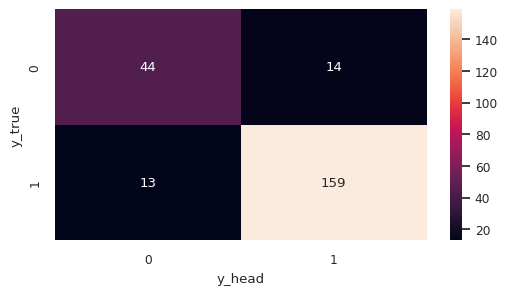

In [ ]:
f, ax = plt.subplots(figsize=(6,3))
sns.heatmap(confusion_matrix(Y_test, predictions), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

## Tahap 10: Melakukan Proses Review Pemodelan

Tabel diatas : <br>
1. TP ==> Data LANCAR (0)  yang ada di datasheet   dan HASIL DARI PREDIKSI LANCAR  = 44 <BR>  antara datasheet dan hasil prediksi 44 <br>
2. TN ==> Data MACET (1) yang ada di datasheet   dan HASIL DARI PREDIKSI MACET = 159 <BR>  antara datasheet dan hasil prediksi 159 <br>
3. FN ==> Data MACET (1) yang ada di datasheet   dan HASIL DARI PREDIKSI TERNYATA LANCAR = 13 <BR>   
4. FP ==> Data LANCAR (0) yang ada di datasheet   dan HASIL DARI PREDIKSI TERNYATA MACET = 14 <BR>   

Jika dilihat dari confusion matrix diatas dari 57 NASABAH lancar, model memprediksi ada 7 nasabah yang diprediksi macet (FN), dan dari 173  NASABAH  MACET, model memprediksi ada 14 NASABAH  yang diprediksi LANCAR  (FP). Prediksi yang benar terletak pada tabel diagonal (garis bawah merah), sehingga secara visual sangat mudah untuk melihat kesalahan prediksi karena kesalahan prediksi berada di luar tabel diagonal confusion matrix.

In [ ]:
print('TP = ', confusion_array[0,0] ) # True Negative
print('FN = ', confusion_array[1,0] ) # False Negative
print('TN = ', confusion_array[1,1] ) # True Positive
print('FP = ', confusion_array[0,1] ) # False Positive

TP =  44
FN =  13
TN =  159
FP =  14


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77        58
           1       0.92      0.92      0.92       172

    accuracy                           0.88       230
   macro avg       0.85      0.84      0.84       230
weighted avg       0.88      0.88      0.88       230



In [ ]:
from io import StringIO
from sklearn import tree
from IPython.display import Image

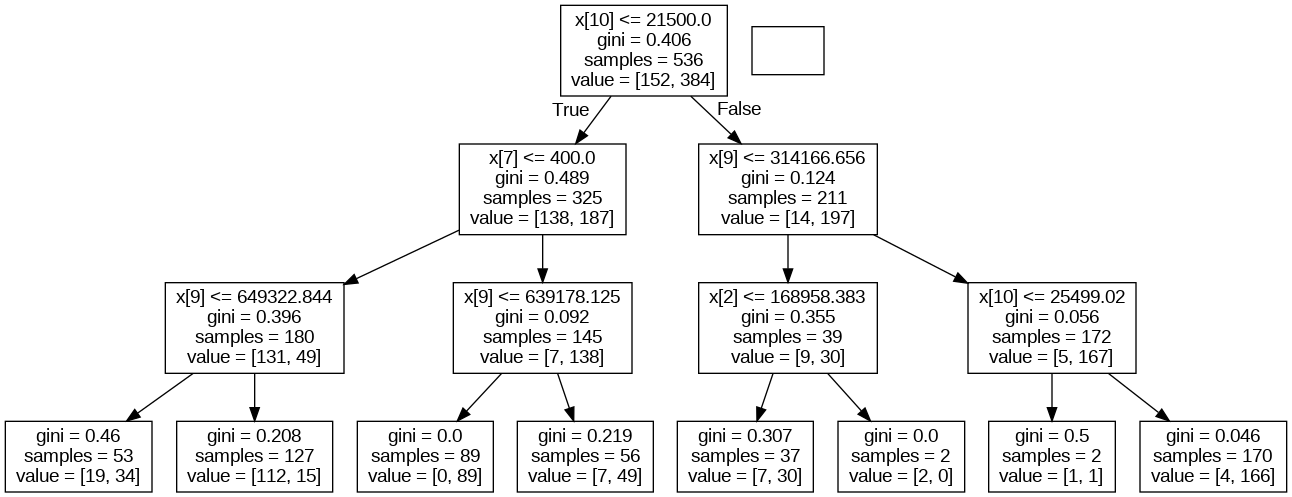

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

out = StringIO()
tree.export_graphviz(model, out_file=out)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

[Text(0.5, 0.875, 'x[10] <= 21500.0\ngini = 0.406\nsamples = 536\nvalue = [152, 384]'),
 Text(0.25, 0.625, 'x[7] <= 400.0\ngini = 0.489\nsamples = 325\nvalue = [138, 187]'),
 Text(0.125, 0.375, 'x[9] <= 649322.844\ngini = 0.396\nsamples = 180\nvalue = [131, 49]'),
 Text(0.0625, 0.125, 'gini = 0.46\nsamples = 53\nvalue = [19, 34]'),
 Text(0.1875, 0.125, 'gini = 0.208\nsamples = 127\nvalue = [112, 15]'),
 Text(0.375, 0.375, 'x[9] <= 639178.125\ngini = 0.092\nsamples = 145\nvalue = [7, 138]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 89\nvalue = [0, 89]'),
 Text(0.4375, 0.125, 'gini = 0.219\nsamples = 56\nvalue = [7, 49]'),
 Text(0.75, 0.625, 'x[9] <= 314166.656\ngini = 0.124\nsamples = 211\nvalue = [14, 197]'),
 Text(0.625, 0.375, 'x[2] <= 168958.383\ngini = 0.355\nsamples = 39\nvalue = [9, 30]'),
 Text(0.5625, 0.125, 'gini = 0.307\nsamples = 37\nvalue = [7, 30]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.875, 0.375, 'x[10] <= 25499.02\ngini = 0.056\nsa

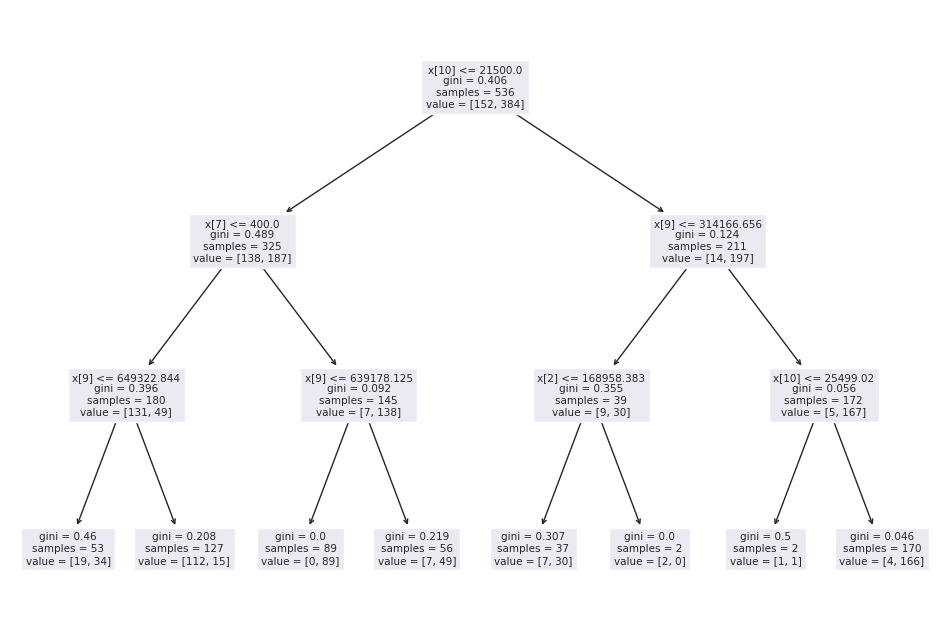

In [ ]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(model.fit(X_train, Y_train))